In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
plt.style.use('default')

In [13]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [4]:
import os
def plot_imgs(directory, top=10):
    all_item_dirs = os.listdir(directory)
    item_files = [os.path.join(directory, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(20, 20))
  
    for i, img_path in enumerate(item_files):
        plt.subplot(10, 10, i+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

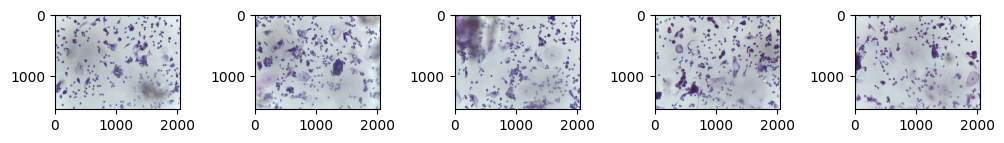

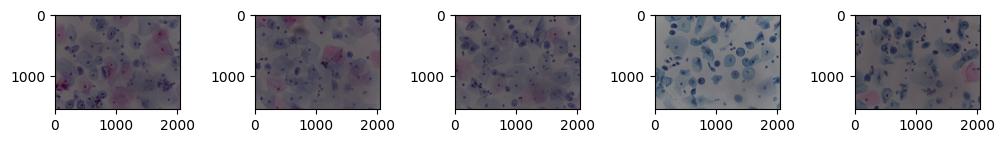

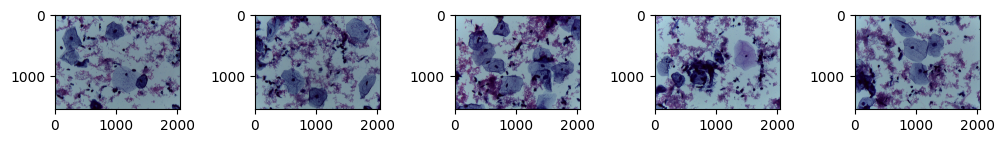

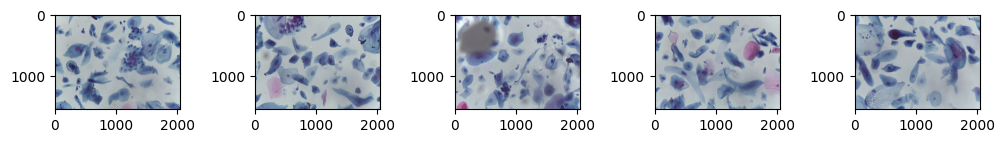

In [5]:
data_path = 'DataKaggle/train/'

directories = ['HSIL','LSIL','NL','SCC'] 

for j in directories:
    plot_imgs(data_path+j)

In [6]:
batch_size = 16
train_datagen = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
Categories=['HSIL','LSIL','NL','SCC'] 
train_data_path = 'DataKaggle/Train/'
test_data_path = 'DataKaggle/Test/'

train_set = train_datagen.flow_from_directory(train_data_path, target_size = (224,224),
                                              batch_size = batch_size, 
                                              color_mode = 'rgba',
                                              class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_data_path, target_size = (224,224),
                                              batch_size = batch_size, 
                                              color_mode = 'rgba',
                                              class_mode = 'categorical')

Found 826 images belonging to 4 classes.
Found 136 images belonging to 4 classes.


In [14]:
classes = 4

model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (224,224,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(classes, activation = 'softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 128)     

In [15]:
# import keras
# optimizer1 = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss = 'categorical_crossentropy',optimizer = "adam" , metrics = ['accuracy'])

In [16]:
model_path="saved_models/CNNKaggle.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [17]:
num_epochs = 10
training_steps=train_set.n//train_set.batch_size
validation_steps =test_set.n//test_set.batch_size

In [18]:
history = model.fit(train_set, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=test_set,
                    validation_steps=validation_steps, callbacks = callbacks_list)

Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.9730 - accuracy: 0.6531
Epoch 1: val_accuracy improved from -inf to 0.45312, saving model to saved_models\CNNKaggle.h5
51/51 [==============================] - 100s 2s/step - loss: 0.9730 - accuracy: 0.6531 - val_loss: 1.1603 - val_accuracy: 0.4531
Epoch 2/10
51/51 [==============================] - ETA: 0s - loss: 0.6444 - accuracy: 0.7395
Epoch 2: val_accuracy improved from 0.45312 to 0.48438, saving model to saved_models\CNNKaggle.h5
51/51 [==============================] - 90s 2s/step - loss: 0.6444 - accuracy: 0.7395 - val_loss: 1.4420 - val_accuracy: 0.4844
Epoch 3/10
51/51 [==============================] - ETA: 0s - loss: 0.6488 - accuracy: 0.7160
Epoch 3: val_accuracy improved from 0.48438 to 0.83594, saving model to saved_models\CNNKaggle.h5
51/51 [==============================] - 87s 2s/step - loss: 0.6488 - accuracy: 0.7160 - val_loss: 0.6784 - val_accuracy: 0.8359
Epoch 4/10
51/51 [=====================

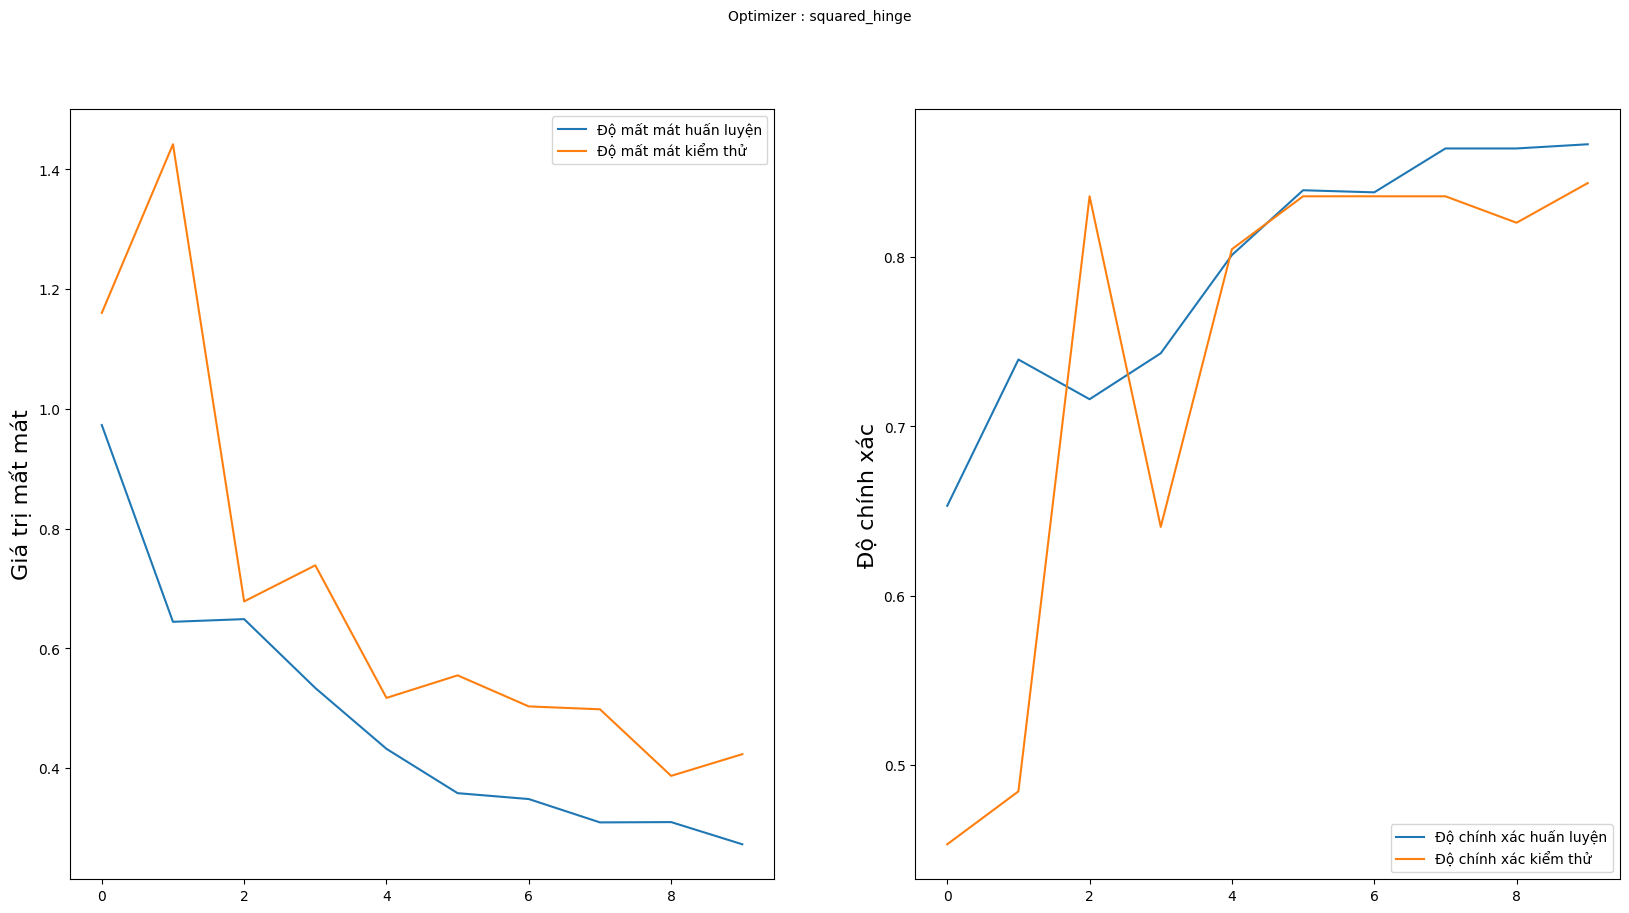

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : squared_hinge', fontsize=10)
plt.ylabel('Giá trị mất mát', fontsize=16)
plt.plot(history.history['loss'], label='Độ mất mát huấn luyện')
plt.plot(history.history['val_loss'], label='Độ mất mát kiểm thử')
plt.legend(loc='upper right')
plt.subplot(1, 2, 2)
plt.ylabel('Độ chính xác', fontsize=16)
plt.plot(history.history['accuracy'], label='Độ chính xác huấn luyện')
plt.plot(history.history['val_accuracy'], label='Độ chính xác kiểm thử')
plt.legend(loc='lower right')
plt.show()

9/9 [==============================] - 13s 1s/step
Classification Report:
----------------------
               precision    recall  f1-score   support

        HSIL       0.22      0.22      0.22        32
        LSIL       0.23      0.21      0.22        24
          NL       0.47      0.55      0.51        64
         SCC       0.00      0.00      0.00        16

    accuracy                           0.35       136
   macro avg       0.23      0.24      0.24       136
weighted avg       0.31      0.35      0.33       136



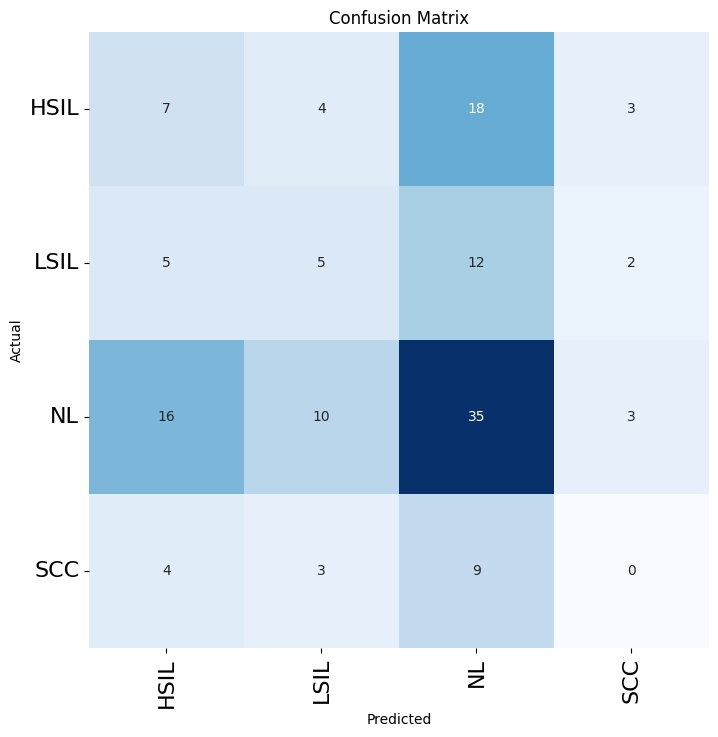

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns

def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_set, model)